**Mount google drive in colab**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Data**

In [2]:
import pandas as pd
file_path='/content/drive/MyDrive/ColabData/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(file_path)
#Preview data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Understanding Data**

In [3]:
df.info()
df.describe()
df['Churn'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,count
Churn,
No,5174
Yes,1869


**EDA + Visualization**

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

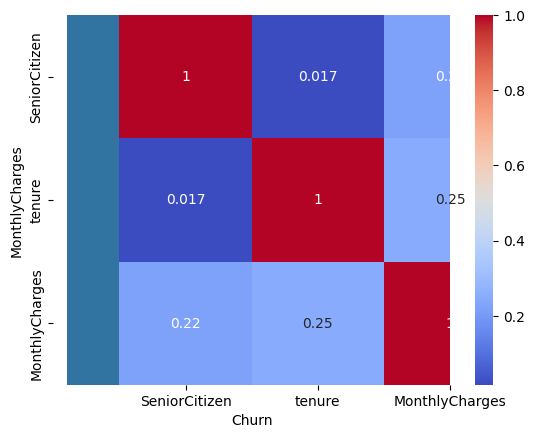

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
#Churn count plot
sns.countplot(data=df,x='Churn')
#Check correlation of numerical features
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
#Boxplot:MonthlyCharges vs Churn
sns.boxplot(data=df,x='Churn',y='MonthlyCharges')

In [5]:
for i,col in enumerate(df.columns):
  print(f"{i}:'{col}'")

0:'customerID'
1:'gender'
2:'SeniorCitizen'
3:'Partner'
4:'Dependents'
5:'tenure'
6:'PhoneService'
7:'MultipleLines'
8:'InternetService'
9:'OnlineSecurity'
10:'OnlineBackup'
11:'DeviceProtection'
12:'TechSupport'
13:'StreamingTV'
14:'StreamingMovies'
15:'Contract'
16:'PaperlessBilling'
17:'PaymentMethod'
18:'MonthlyCharges'
19:'TotalCharges'
20:'Churn'


In [6]:


# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values
df = df.fillna(df.median(numeric_only=True))

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
for column in df.select_dtypes(include='object').columns:
    if column != 'Churn':
        df[column] = LabelEncoder().fit_transform(df[column])

# Convert target to binary
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Preview
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [8]:
print(df['Churn'].isnull().sum())

0


In [9]:
print(df.shape)
print(df['Churn'].value_counts())

(7043, 21)
Churn
0    5174
1    1869
Name: count, dtype: int64


**Train_test_split + scaling**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=df.drop('Churn',axis=1)
y=df['Churn']
#Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
#Scale Features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**Train Classical ML Models**

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

#LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
print("Logistic Regression")
print(classification_report(y_test,lr.predict(X_test)))

#Random Forest Classsifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
print("Random Forest:")
print(classification_report(y_test,rf.predict(X_test)))

Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



**Deep Learning Model**

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid') #binary classification
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

**Train the model**

In [14]:
history=model.fit(X_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.6916 - loss: 0.5719 - val_accuracy: 0.7702 - val_loss: 0.4586
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7696 - loss: 0.4633 - val_accuracy: 0.7782 - val_loss: 0.4509
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7907 - loss: 0.4406 - val_accuracy: 0.7764 - val_loss: 0.4471
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7895 - loss: 0.4341 - val_accuracy: 0.7773 - val_loss: 0.4451
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7950 - loss: 0.4390 - val_accuracy: 0.7844 - val_loss: 0.4425
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7985 - loss: 0.4303 - val_accuracy: 0.7897 - val_loss: 0.4431
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8053 - loss: 0.4169 - val_accuracy: 0.7862 - val_loss: 0.4431
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8148 - loss: 0.4032 - val_accuracy: 0

**Evaluate Deep Learning model**

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7821 - loss: 0.4350
Test Accuracy:0.7892


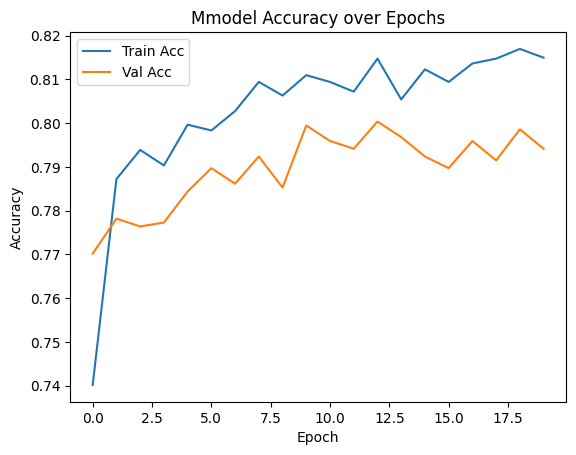

In [15]:
loss,accuracy=model.evaluate(X_test,y_test)
print(f"Test Accuracy:{accuracy:.4f}")

#Plot training history
plt.plot(history.history['accuracy'],label='Train Acc')
plt.plot(history.history['val_accuracy'],label='Val Acc')
plt.legend()
plt.title('Mmodel Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()